<a href="https://colab.research.google.com/github/srumangala/Deep_learning/blob/main/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST with CNN

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

Load Dataset and normalize input

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
x_train = x_train/255.0
x_test = x_test/255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Viewing input image

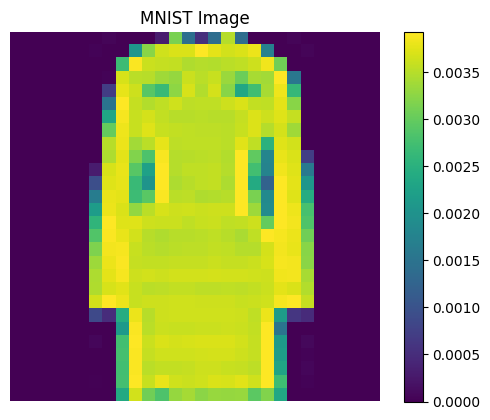

In [7]:
plt.figure()
plt.imshow(x_train[500])
plt.title('Fashion-MNIST Image')
plt.colorbar() # range of colors bw numerical values
plt.axis("off")
plt.show()

First 25 Images and corresponding class

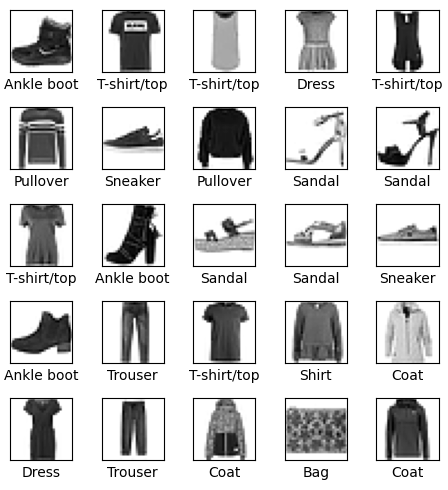

In [8]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)  # 5 rows, 5 columns, i+1th plot
    plt.xticks([]) # remove tick marks
    plt.yticks([])
    plt.grid(False) # removes grid lines
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.tight_layout()
plt.show()

Defining The network

```model = keras.Sequential([...]):``` This line creates an instance of a Sequential model. The Sequential model is a linear stack of layers, where you can add layers one by one in sequence.

Convolution is performed on input image of size 28x28x1 two times with kernel of size 3x3

It is followed by 25% dropout

Followed by pooling layer and then deep layers

Finally the output layer has 10 neurons and softmax activation function

In [36]:
model = keras.Sequential ([
    keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10,activation='softmax')])

Setting Optimizer and Compiling model proceeded by training (all same as before)

Using Stochastic Gradient Descent optimizer and sparce categorical cross entropy which is similar to categorical CE

In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #metrics Used to monitor the training and testing steps.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 dropout_16 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               262272    
                                                      

In [38]:
history = model.fit(x_train,y_train,batch_size=32, epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 12s 5ms/step - loss: 0.9386 - accuracy: 0.6489 - val_loss: 0.6295 - val_accuracy: 0.7615
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5990 - accuracy: 0.7737 - val_loss: 0.5667 - val_accuracy: 0.7868
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5537 - accuracy: 0.7940 - val_loss: 0.5258 - val_accuracy: 0.8140
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5250 - accuracy: 0.8060 - val_loss: 0.4887 - val_accuracy: 0.8224
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5042 - accuracy: 0.8125 - val_loss: 0.4918 - val_accuracy: 0.8243
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4885 - accuracy: 0.8181 - val_loss: 0.4864 - val_accuracy: 0.8201
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4762 - accuracy: 0.8233 - val_loss: 0.4628 - val_accura

Plotting Training and Validation loss and accuracy


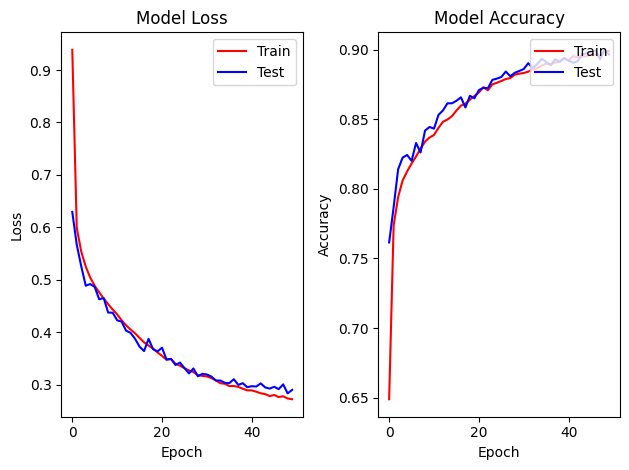

In [39]:
plt.subplot(1, 2,1) # 1 row 2 columns, 1st column
#plt.figure(figsize=(3, 3))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.subplot(1, 2, 2) # 1 row 2 columns, 2nd column
#plt.figure(figsize=(3, 3))
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.tight_layout()
plt.show()

Viewing predicted and actual class of image

In [40]:
x_predict=model.predict(x_test) # set of predicted values

313/313 [==============================] - 1s 2ms/step


In [44]:
print(x_predict[400]) # probability for all classes
class_names[np.argmax([x_predict[400]])] # max probability index

[9.56215262e-01 1.02683856e-07 2.81001417e-06 2.52896221e-03
 4.04351308e-09 1.04040249e-10 4.12524976e-02 6.49592119e-23
 2.65489035e-07 9.24764019e-18]


'T-shirt/top'

In [45]:
class_names[y_test[400]] # testing actual results

'T-shirt/top'

Plotting predictions for 1 image

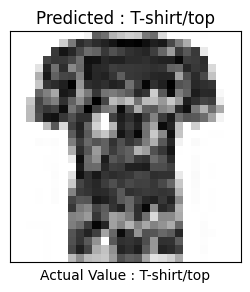

In [49]:
i=400
plt.figure(figsize=(3, 3))
plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.title('Predicted : '+str(class_names[((tf.argmax(x_predict[i]).numpy()))]))
plt.xticks([])
plt.yticks([])
plt.xlabel('Actual Value : '+class_names[y_test[i]])
plt.show()

Plotting predictions for 9 images

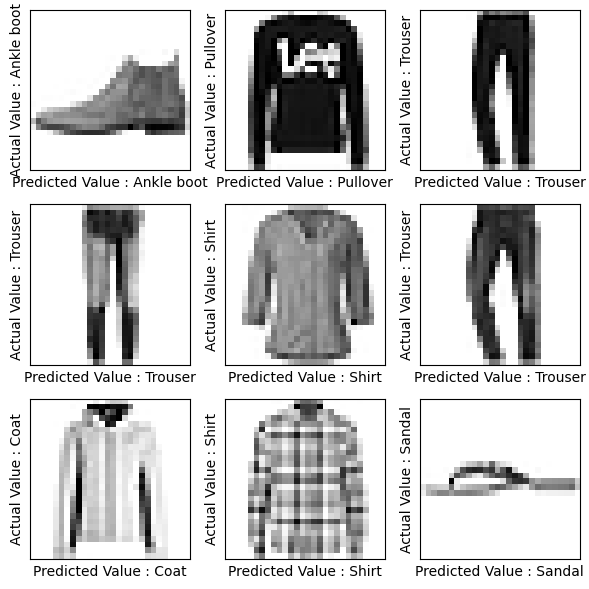

In [68]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)  # 5 rows, 5 columns, i+1th plot
    plt.xticks([]) # remove tick marks
    plt.yticks([])
    plt.grid(False) # removes grid lines
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.ylabel('Actual Value : '+class_names[y_test[i]])
    plt.xlabel('Predicted Value : '+class_names[(tf.argmax(x_predict[i]).numpy())])
    plt.tight_layout() # to make everything look good
plt.show()

Seperating result into prediction probability and class label

In [51]:
y_predict_class_value = np.round(tf.squeeze(tf.math.reduce_max(x_predict, axis=1)).numpy()*100,2) # capturing only the max values and rounding them, reducing dimensions
print(y_predict_class_value) # value of maximum probability
y_predict_class_label=tf.argmax(x_predict,axis=1) # capturing max argument so that class prediction is obtained
print(y_predict_class_label) # predicted class

[ 97.92  99.87 100.   ... 100.   100.    74.04]
tf.Tensor([9 2 1 ... 8 1 5], shape=(10000,), dtype=int64)


Comparing with actual y_test for errors - only 52 - much lower than previous

In [52]:
incorrect_indices= tf.squeeze(tf.where(tf.not_equal(y_predict_class_label, y_test))).numpy() # capturing the incorrect indices by checking equality
print(len(incorrect_indices)) # these many wrong classifications

1036


Plotting 16 of wrong classifications with predicted value and accuracy with actual value

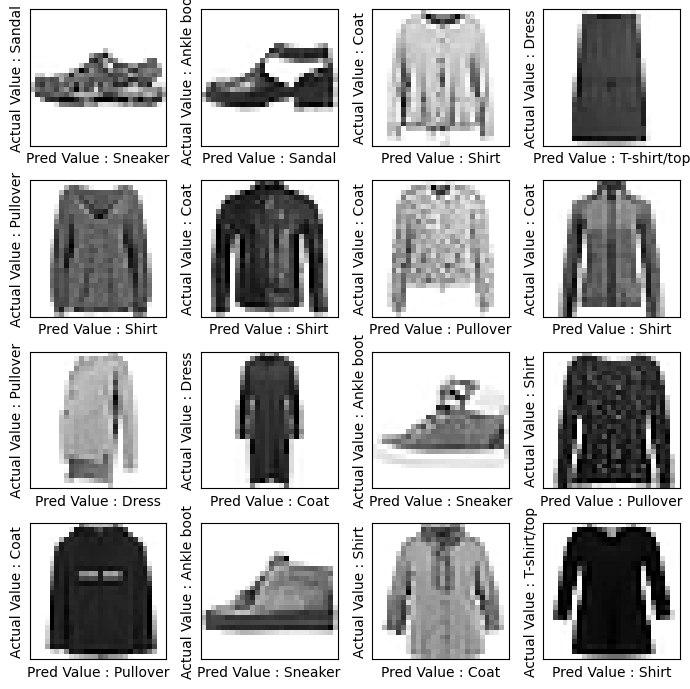

In [67]:
plt.figure(figsize=(7,7))
for i in range(16):
    plt.subplot(4,4,i+1)  # 4 rows, 3 columns, i+1th plot
    plt.xticks([]) # remove tick marks
    plt.yticks([])
    plt.grid(False) # removes grid lines
    plt.imshow(x_test[incorrect_indices[i]], cmap=plt.cm.binary) # black and white
    plt.ylabel('Actual Value : '+class_names[y_test[incorrect_indices[i]]])
    plt.xlabel('Pred Value : '+str(class_names[(tf.argmax(x_predict[incorrect_indices[i]]).numpy())]))
    #plt.title('Prediction accuracy'+str(y_predict_class_value[incorrect_indices[i]].numpy()*100))
    plt.tight_layout()
plt.show()